#Mohammad Naser Muzayen

##Data Science and Business Analytics Intern
##Stock Market Prediction

##1 - Numerical analysis of historical stock prices

###Download Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
start = pd.to_datetime(['2017-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-04-17']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'AMZN' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df.to_csv('amazon.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
1,2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2,2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100
3,2017-01-06,782.359985,799.440002,778.479980,795.989990,795.989990,5986200
4,2017-01-09,798.000000,801.770020,791.770020,796.919983,796.919983,3446100


###Data Visuvalization

In [ ]:
close = df.reset_index()['Close']

In [ ]:
close.head()

0    753.669983
1    757.179993
2    780.450012
3    795.989990
4    796.919983
Name: Close, dtype: float64

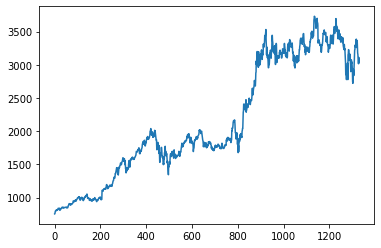

In [ ]:
plt.plot(close)

###Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(close).reshape(-1,1))

In [ ]:
data

array([[0.        ],
       [0.00117875],
       [0.00899341],
       ...,
       [0.75966339],
       [0.79159031],
       [0.76583582]])

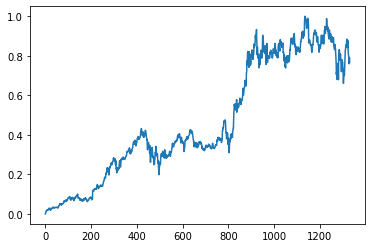

In [ ]:
plt.plot(data)

In [ ]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size

In [ ]:
print('Full Data Size: ', len(data))
print('Train Size: ', train_size)
print('Test Size: ', test_size)

Full Data Size:  1331
Train Size:  998
Test Size:  333


split train,test data

In [ ]:
train_data, test_data = data[:train_size,:], data[train_size:len(data),:] 

In [ ]:
print('Full Data Size: ', len(data))
print('Train Size: ', len(train_data))
print('Test Size: ', len(test_data))

Full Data Size:  1331
Train Size:  998
Test Size:  333


In [ ]:
test_data[232:].shape

(101, 1)

In [ ]:
def create_dataset(dataset, time_step=1):
  datax,datay=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax),np.array(datay)

In [ ]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)


In [ ]:
x_train

array([[0.        , 0.00117875, 0.00899341, ..., 0.07316623, 0.07612485,
        0.08050066],
       [0.00117875, 0.00899341, 0.01421212, ..., 0.07612485, 0.08050066,
        0.08130665],
       [0.00899341, 0.01421212, 0.01452444, ..., 0.08050066, 0.08130665,
        0.0816156 ],
       ...,
       [0.74985731, 0.75736632, 0.77291504, ..., 0.78936711, 0.78845704,
        0.79347089],
       [0.75736632, 0.77291504, 0.75448499, ..., 0.78845704, 0.79347089,
        0.80708861],
       [0.77291504, 0.75448499, 0.76563437, ..., 0.79347089, 0.80708861,
        0.80982564]])

In [ ]:
print('x_Train: ', len(x_train))
print('y_Train: ', len(y_train))

x_Train:  897
y_Train:  897


reshape data

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

###Build Model for prediction

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [ ]:
model = Sequential()
model.add(Input(shape = (100,1)))
model.add(LSTM(50,activation='relu',return_sequences=True))

model.add(LSTM(50,activation='relu', return_sequences=True))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 7s 501ms/step - loss: 0.0494 - val_loss: 0.0161
Epoch 2/100
15/15 [==============================] - 5s 329ms/step - loss: 0.0124 - val_loss: 0.0038
Epoch 3/100
15/15 [==============================] - 4s 238ms/step - loss: 0.0054 - val_loss: 0.0089
Epoch 4/100
15/15 [==============================] - 3s 180ms/step - loss: 0.0028 - val_loss: 0.0121
Epoch 5/100
15/15 [==============================] - 3s 178ms/step - loss: 0.0019 - val_loss: 0.0085
Epoch 6/100
15/15 [==============================] - 3s 178ms/step - loss: 0.0017 - val_loss: 0.0072
Epoch 7/100
15/15 [==============================] - 3s 177ms/step - loss: 0.0016 - val_loss: 0.0068
Epoch 8/100
15/15 [==============================] - 3s 181ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 9/100
15/15 [==============================] - 3s 180ms/step - loss: 0.0014 - val_loss: 0.0061
Epoch 10/100
15/15 [==============================] - 3s 179ms/step - loss: 0.0014 - val_lo

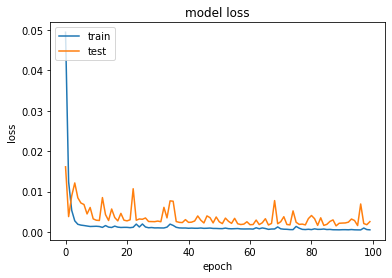

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Evaluate Metrics

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1915.7721693785982

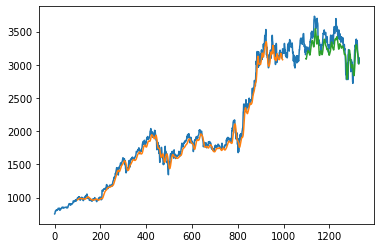

In [ ]:
#split train predict for plot
look_back=100
trainpredictplot=np.empty_like(data)
trainpredictplot[:, :]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#shif test predict for plot
testpredictplot=np.empty_like(data)
testpredictplot[:, :]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(data)-1,:]=test_predict
plt.plot(scaler.inverse_transform(data))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


###Save Model

In [ ]:
model.save('stock_market_prediction.h5')

###Test

In [ ]:
x_input=test_data[232:].reshape(1,-1)
x_input.shape

(1, 101)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
len(temp_input)

101

In [ ]:
from numpy import array
lst_output=[]
n_steps= 100
for day in range(30):
  x_input=np.array(temp_input[1:])
  print("{} day input {}".format(day,x_input))
  x_input=x_input.reshape(1,-1)
  x_input = x_input.reshape((1, n_steps, 1))
  yhat = model.predict(x_input, verbose=0)
  print("{} day output {}".format(day,yhat))
  temp_input.extend(yhat[0].tolist())
  temp_input=temp_input[1:]
  lst_output.extend(yhat.tolist())

0 day input [0.94665758 0.94916619 0.9492904  0.92381811 0.94296351 0.92466104
 0.90338648 0.90125068 0.88527545 0.89789579 0.93010811 0.93006441
 0.91671872 0.90356111 0.88579936 0.88260229 0.91096944 0.88112125
 0.88882178 0.86908533 0.89150502 0.89566922 0.89588083 0.88648437
 0.89314381 0.88333773 0.87959996 0.86665396 0.89142107 0.8720607
 0.85080295 0.84339471 0.83869315 0.83151989 0.85755307 0.85651198
 0.82969302 0.83589907 0.8142686  0.79668139 0.76557395 0.70496087
 0.71772887 0.68711507 0.67963624 0.68477438 0.71392738 0.75150955
 0.76239033 0.758488   0.67945488 0.80568489 0.80767295 0.83103296
 0.82952847 0.81484621 0.77649499 0.78907835 0.79810193 0.80878118
 0.78562269 0.77184714 0.75570064 0.71962969 0.76349513 0.77981963
 0.77830505 0.76204442 0.76815979 0.7402594  0.72509693 0.6701022
 0.6604405  0.68236654 0.73299891 0.72431443 0.69965481 0.73668626
 0.7752222  0.80299492 0.82993817 0.83155687 0.85437617 0.84442899
 0.84605105 0.8536004  0.88192392 0.88410342 0.86385

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(len(data)+1,len(data)+31)

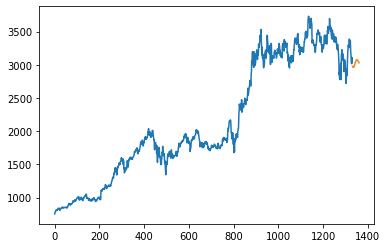

In [ ]:
# plt.plot(day_new,scaler.inverse_transform(data[1231:]))
plt.plot(scaler.inverse_transform(data))
plt.plot(day_pred,scaler.inverse_transform(lst_output));

##Stock Sentiment Analysis

In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content' 
import pandas as pd

In [4]:
!kaggle datasets download -d aaron7sun/stocknews

  0% 0.00/5.82M [00:00<?, ?B/s]
100% 5.82M/5.82M [00:00<00:00, 213MB/s]


In [7]:
!unzip ./stocknews.zip

Archive:  ./stocknews.zip
  inflating: Combined_News_DJIA.csv  
  inflating: RedditNews.csv          
  inflating: upload_DJIA_table.csv   


In [20]:
df = pd.read_csv('Combined_News_DJIA.csv')

In [21]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

###train test split

In [22]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [27]:
print('Train size:', train.shape[0])
print('Test size:',test.shape[0])

Train size: 1863
Test size: 378


###Removing punctuations

In [30]:
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

###Renaming column names for ease of access

In [31]:
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,...,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,...,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...
3,b U S refuses Israel weapons to attack Iran ...,b When the president ordered to attack Tskhinv...,b Israel clears troops who killed Reuters cam...,b Britain s policy of being tough on drugs is...,b Body of year old found in trunk Latest ...,b China has moved million quake survivors...,b Bush announces Operation Get All Up In Russi...,b Russian forces sink Georgian ships,b The commander of a Navy air reconnaissance s...,b of CNN readers Russia s actions in Geor...,...,b Elephants extinct by,b US humanitarian missions soon in Georgia i...,b Georgia s DDOS came from US sources,b Russian convoy heads into Georgia violating...,b Israeli defence minister US against strike ...,b Gorbachev We Had No Choice,b Witness Russian forces head towards Tbilisi...,b Quarter of Russians blame U S for conflict...,b Georgian president says US military will ta...,b Nobel laureate Aleksander Solzhenitsyn...
4,b All the experts admit that we should legalis...,b War in South Osetia pictures made by a ...,b Swedish wrestler Ara Abrahamian throws away ...,b Russia exaggerated the death toll in South O...,b Missile That Killed Inside Pakistan May Ha...,b Rushdie Cond

### Convert Columns to text

In [35]:
' '.join(str(x) for x in data.iloc[0,0:25])

'b Georgia  downs two Russian warplanes  as countries move to brink of war  b BREAKING  Musharraf to be impeached   b Russia Today  Columns of troops roll into South Ossetia  footage from fighting  YouTube   b Russian tanks are moving towards the capital of South Ossetia  which has reportedly been completely destroyed by Georgian artillery fire  b Afghan children raped with  impunity   U N  official says   this is sick  a three year old was raped and they do nothing  b     Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets   b Breaking  Georgia invades South Ossetia  Russia warned it would intervene on SO s side  b The  enemy combatent  trials are nothing but a sham  Salim Haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b Georgian troops retreat from S  Osettain capital  presumably leaving several hundred people killed   VIDEO   b Did the U S  Prep Georgia for War with Russia   b Rice Gives Green

In [36]:
headlines = []
for row in range(len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [37]:
headlines[0]

'b Georgia  downs two Russian warplanes  as countries move to brink of war  b BREAKING  Musharraf to be impeached   b Russia Today  Columns of troops roll into South Ossetia  footage from fighting  YouTube   b Russian tanks are moving towards the capital of South Ossetia  which has reportedly been completely destroyed by Georgian artillery fire  b Afghan children raped with  impunity   U N  official says   this is sick  a three year old was raped and they do nothing  b     Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets   b Breaking  Georgia invades South Ossetia  Russia warned it would intervene on SO s side  b The  enemy combatent  trials are nothing but a sham  Salim Haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b Georgian troops retreat from S  Osettain capital  presumably leaving several hundred people killed   VIDEO   b Did the U S  Prep Georgia for War with Russia   b Rice Gives Green

###Train Model

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#### implement BAG OF WORDS

In [39]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

####implement RandomForest Classifier

In [40]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

####Predict for the Test Dataset

In [41]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [43]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[131  55]
 [  2 190]]
0.8492063492063492
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       186
           1       0.78      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378

